# EDA on football stats

Playing around for a bit first.

Data downloaded from http://nflsavant.com/

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [128]:
pd.options.display.max_colwidth = 200

In [101]:
full_df = pd.read_csv('data/pbp-2018.csv')

In [102]:
full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False])

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
1841,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,NaN,1,NaN,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN ...,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0
1842,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,NaN,0,NaN,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0
1843,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,NaN,1,NaN,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0
25574,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,NaN,0,NaN,0,(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 2...,0,NaN,NaN,2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0
25575,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,NaN,0,NaN,0,(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SH...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10
25576,2018090902,2018-09-09,1,13,18,IND,CIN,2,14,86,NaN,0,NaN,0,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT IN...,0,NaN,NaN,2018,2,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,14,OPP,0,NaN,0,NaN,0
1844,2018090902,2018-09-09,1,13,10,CIN,IND,1,10,7,NaN,0,NaN,0,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4...,0,NaN,NaN,2018,4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT GUARD,7,OWN,0,NaN,0,NaN,0
1845,2018090902,2018-09-09,1,12,32,CIN,IND,2,6,11,NaN,1,NaN,0,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.E...,0,NaN,NaN,2018,29,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,11,OWN,0,NaN,0,NaN,0
1846,2018090902,2018-09-09,1,11,55,CIN,IND,1,10,40,NaN,0,NaN,0,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YA...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,40,OWN,0,NaN,0,NaN,0
1847,2018090902,2018-09-09,1,11,17,CIN,IND,2,3,47,NaN,1,NaN,0,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,21,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,47,OWN,0,NaN,0,NaN,0


Note for the
  * end of quarter/half/game
  * timeout
  * two-minute warning

the OffenseTeam is NaN.

In [103]:
full_df[(full_df.Minute==0) & (full_df.Second==0)].OffenseTeam[1]

nan

In [104]:
full_df[full_df.OffenseTeam.isna()]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Let's start graphing!

In [105]:
#df = full_df[full_df.GameId==2018090900].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)
df = full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)

In [139]:
def add_time_column(df):
    df['Time'] = (df.Quarter-1)*60*15 + (15-df.Minute)*60 - df.Second

# this hardcoding is really bad
def add_yards_column(df, team1 = 'IND'):
    """Add column Fixed Yards, but with directions reversed for quarters 2 and 4
    (so they teams go in the same direction)"""
    df['Position'] = df.YardLine - 50
    df.Position *= (df.DefenseTeam==team1)*2 - 1
    df.Position += 50

In [137]:
add_time_column(df)
add_yards_column(df)

In [ ]:
df.head()

(0, 3600)

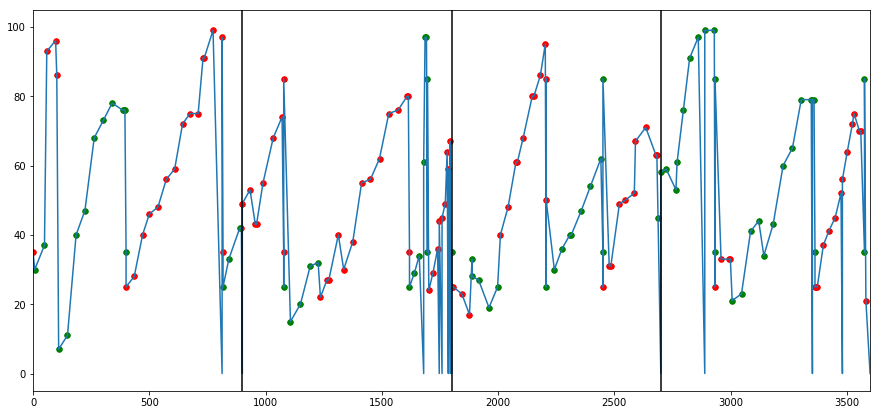

In [109]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.Time, df.Position)
first_down = df[df.Down == 1]


for team, color in zip(['IND', 'CIN'], ['r', 'g']):
    sub_df = df[df.OffenseTeam==team]
    ax.scatter(sub_df.Time, sub_df.Position, s=30, color=color)
    ax.scatter(sub_df.Time, sub_df.Position, s=20, color=color)

ax.axvline(15*60, color='k')
ax.axvline(2*15*60, color='k')
ax.axvline(3*15*60, color='k')
ax.set_xlim(0, 60*15*4)

In [129]:
df[['YardLineDirection', 'OffenseTeam', 'DefenseTeam', 'PlayType', 'Down', 'YardLine', 'Yards', 'Description']]

,YardLineDirection,OffenseTeam,DefenseTeam,PlayType,Down,YardLine,Yards,Description
0,OWN,IND,CIN,KICK OFF,0,35,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN 2. 12-A.ERICKSON TO CIN 30 FOR 28 YARDS (41-M.FARLEY; 23-K.MOORE II).
1,OWN,CIN,IND,RUSH,1,30,7,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR 7 YARDS (53-D.LEONARD).
2,OWN,CIN,IND,PASS,2,37,32,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT INTENDED FOR 28-J.MIXON INTERCEPTED BY 23-K.MOORE II AT CIN 39. 23-K.MOORE II TO CIN 7 FOR 32 YARDS (14-A.DALTON).
3,OPP,IND,CIN,RUSH,1,93,3,"(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 20-J.WILKINS LEFT END TO CIN 4 FOR 3 YARDS (59-N.VIGIL, 97-G.ATKINS)."
4,OPP,IND,CIN,PASS,2,96,0,"(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SHORT LEFT TO 21-N.HINES (22-W.JACKSON). PENALTY ON IND-56-Q.NELSON, OFFENSIVE HOLDING, 10 YARDS, ENFORCED AT CIN 4 - NO PLAY."
5,OPP,IND,CIN,PASS,2,86,2,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT INTENDED FOR 84-J.DOYLE INTERCEPTED BY 52-P.BROWN AT CIN 5. 52-P.BROWN TO CIN 7 FOR 2 YARDS (21-N.HINES).
6,OWN,CIN,IND,RUSH,1,7,4,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4 YARDS (53-D.LEONARD).
7,OWN,CIN,IND,PASS,2,11,29,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.EIFERT PUSHED OB AT CIN 40 FOR 29 YARDS (29-M.HOOKER).
8,OWN,CIN,IND,RUSH,1,40,7,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YARDS (53-D.LEONARD).
9,OWN,CIN,IND,PASS,2,47,21,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT TO 28-J.MIXON TO IND 32 FOR 21 YARDS (26-C.GEATHERS).


In [166]:
def plot_game(ax, df):
    last_pos = None
    last_time = None
    last_type = None
    for i, row in df.iterrows():
        #TODO fix this
        side = 100 if row.DefenseTeam == 'IND' else 0
        # to do: add Color to df
        color = 'r' if row.OffenseTeam == 'IND' else 'b'
    
        if row.PlayType == 'KICK OFF':
            ax.scatter([row.Time], [row.Position], marker="*", s=50, color=color)
            if last_type is not None:
                ax.plot([last_time, row.Time], [last_pos, side], color=color, lw=0.5)
        elif row.PlayType == 'NaN' or row.PlayType == 'TIMEOUT':
            continue
        else:
            if row.Down == 1:
                ax.scatter([row.Time], [row.Position], marker="o", color=color)
            else:
                ax.scatter([row.Time], [row.Position], marker=".", color=color, lw=0.5)
            ax.plot([last_time, row.Time], [last_pos, row.Position], color=color, lw=0.5)

        last_time = row.Time
        last_pos = row.Position
        last_type = row.PlayType
    ax.axvline(15*60, color='k')
    ax.axvline(2*15*60, color='k')
    ax.axvline(3*15*60, color='k')
    for line in range(10, 100, 10):
        ax.axhline(line, color='k', lw=0.3)
    ax.axhline(0, color='k', lw=0.5)
    ax.axhline(100, color='k', lw=0.5)
    ax.axhline(50, color='k', lw=0.5)
    
    ax.set_xticks(np.arange(0, 60*61, 60*5))
    ax.set_xticklabels(np.arange(0, 61, 5))
    ax.set_yticks(np.arange(-10, 111, 10))
    ax.set_yticklabels(['', 0, 10, 20, 30, 40, 50, 40, 30, 20, 10, 0, ''])
    
    ax.set_xlim(0, 60*15*4)
    ax.set_ylim(-10, 110)

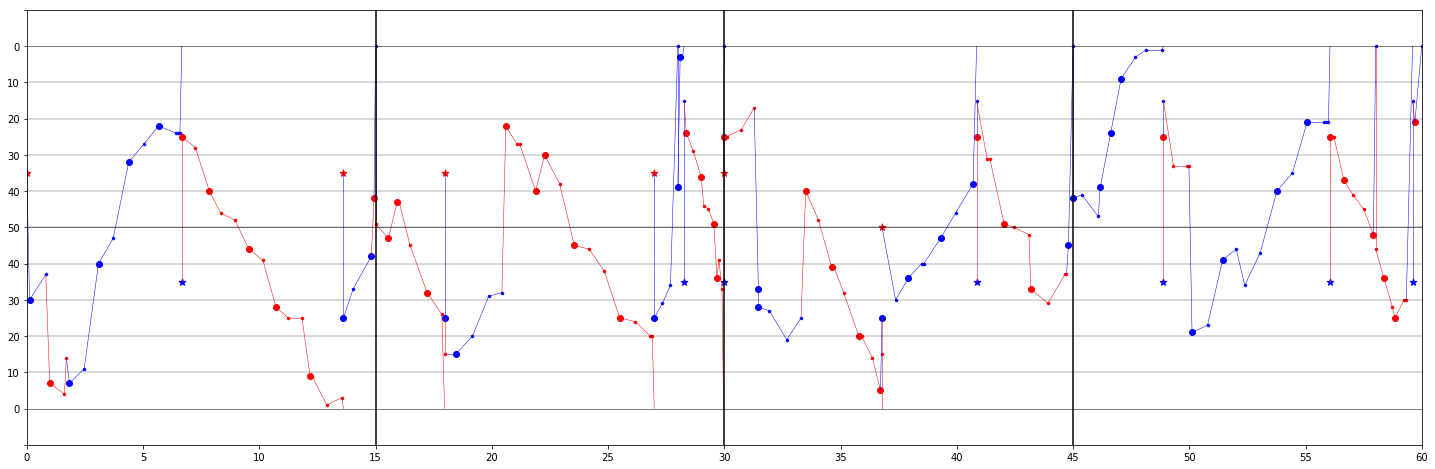

In [168]:
fig, ax = plt.subplots(figsize=(25,8))
plot_game(ax, df)

In [140]:
df.PlayType.value_counts()

PASS           86
RUSH           44
KICK OFF       13
TIMEOUT         7
FIELD GOAL      6
EXTRA POINT     6
SACK            5
PUNT            4
SCRAMBLE        3
NO PLAY         1
Name: PlayType, dtype: int64